In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

# data preprocessing

In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# drop the unnessacry columns

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [11]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [12]:
# check the data types

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
# check the duplicate values

In [15]:
df.duplicated().sum()

0

In [16]:
# rename the columns exited to churn

In [17]:
df.rename(columns={'Exited':'churn'},inplace=True)

In [18]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [19]:
# describe the stats

In [20]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

In [21]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

([<matplotlib.patches.Wedge at 0x2733fd21bb0>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Yes'),
  Text(0.8823431426537006, -0.6568642010431012, 'No')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.63%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.37%')])

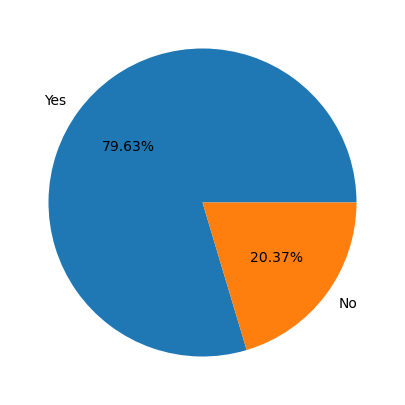

In [22]:
plt.figure(figsize=(10,5))
plt.pie(df['churn'].value_counts(),labels=['Yes','No'],autopct='%1.2f%%')

In [23]:
# above chat we can say that the most of the customer want to continue on the bank

# Gender

# 1.Lets count the male and female 
# 2.and then count based on the churn

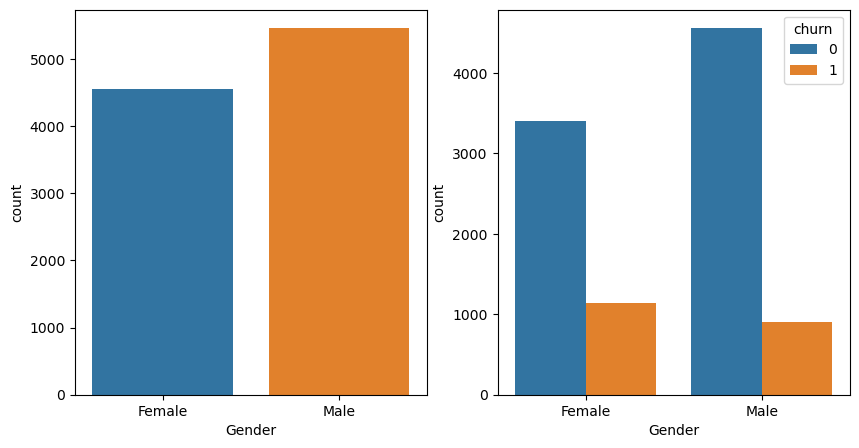

In [49]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Gender',data=df,ax=ax[0])
sns.countplot(x='Gender',data=df,hue='churn',ax=ax[1])
plt.show()

# lets distribute with age

<AxesSubplot:xlabel='Age', ylabel='Count'>

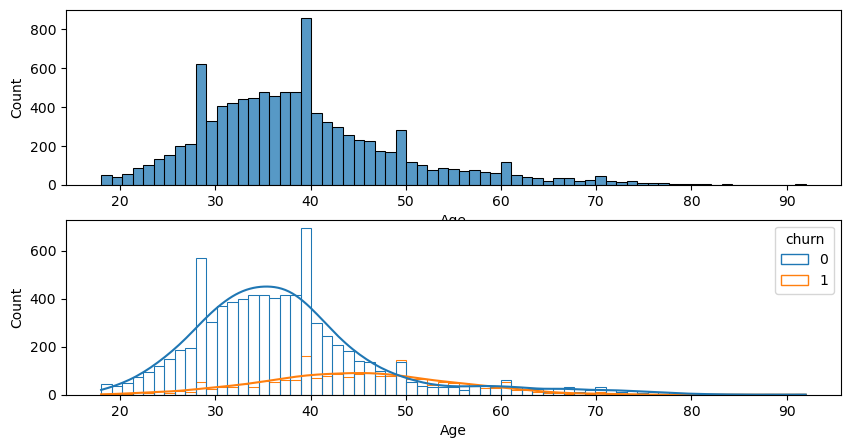

In [64]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
sns.histplot(data=df,x='Age',ax=ax[0])
sns.histplot(data=df,x='Age',ax=ax[1],hue='churn',kde=True,fill=False)

In [65]:
# most the customers are between 20 to 55
# acording to the churn customers from 35 to 60 churn from the bank

# Lets distributed with Credit score

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

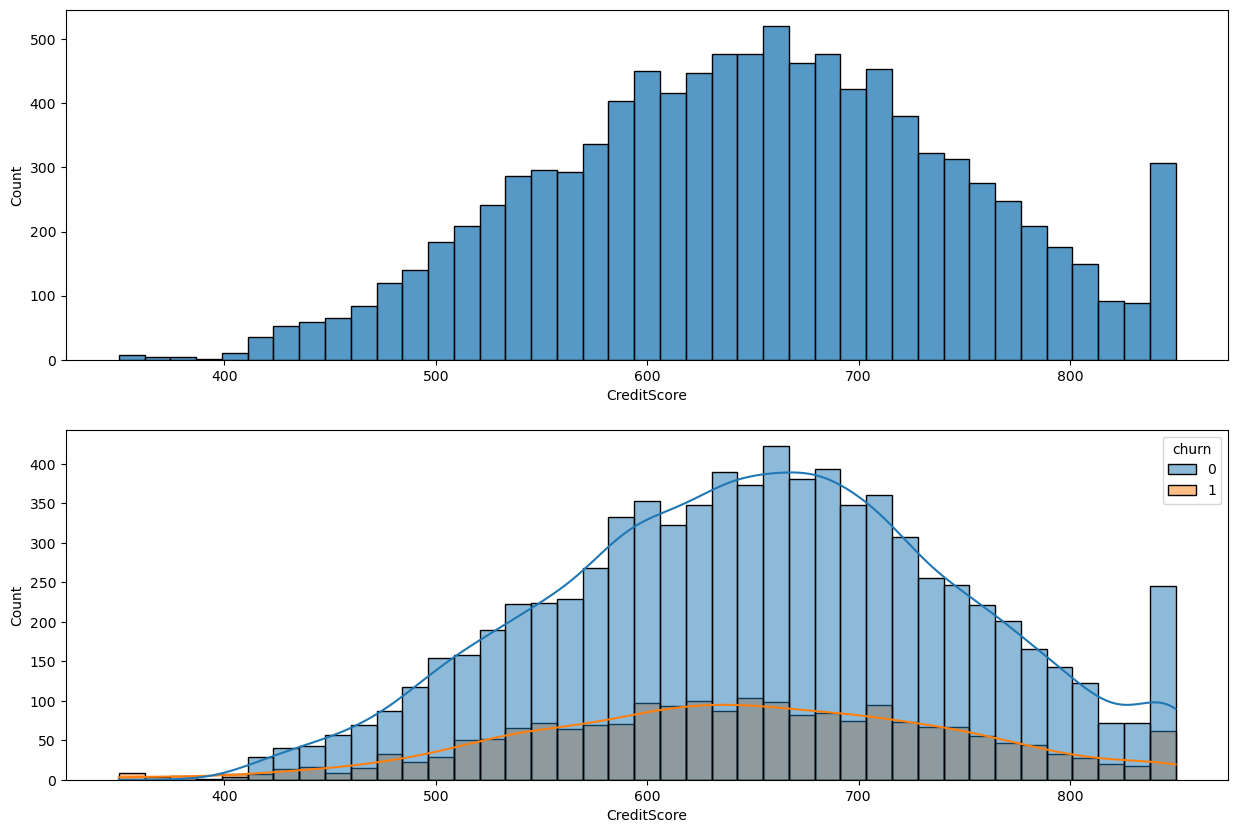

In [70]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.histplot(x='CreditScore',data=df,ax=ax[0])
sns.histplot(x='CreditScore',data=df,ax=ax[1],hue='churn',kde=True)

In [71]:
# from above fig we can say most of the customer have the credit score from 550 to 750
# As per the plt, the customer have the creditscore from 550 to 750 wil churn the most

# Lets distributed with Active customer

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

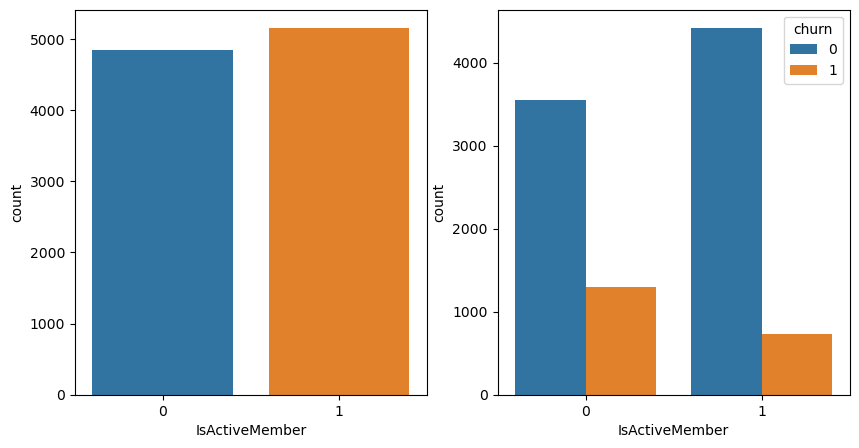

In [77]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='IsActiveMember',data=df,ax=ax[0])
sns.countplot(x='IsActiveMember',data=df,ax=ax[1],hue='churn')

In [78]:
# the active and inactive members are alomost same in the bank
# as compare to active member the inactive memeber wil churn from the bank

# Lets Distributed with Estimated salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

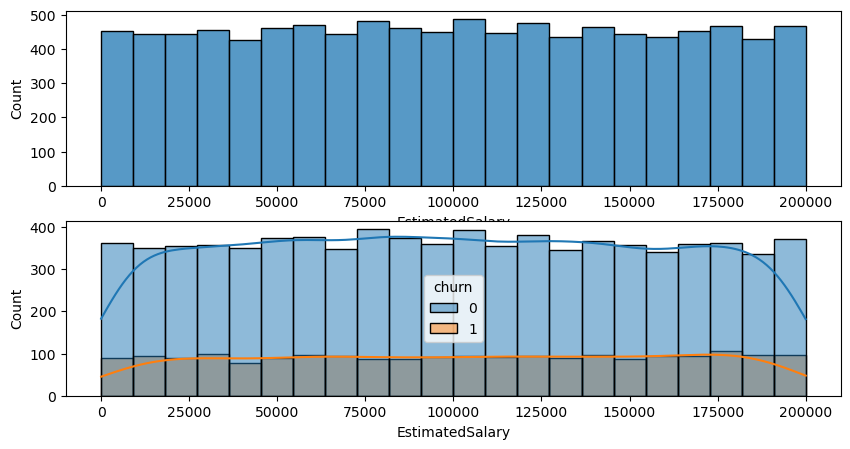

In [82]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
sns.histplot(x='EstimatedSalary',data=df,ax=ax[0])
sns.histplot(x='EstimatedSalary',data=df,ax=ax[1],hue='churn',kde=True)

In [83]:
# we can say the churn is quite equal in every salary cat so don't need to consider this

# Lets distributed with Customer Location

<AxesSubplot:xlabel='Geography', ylabel='count'>

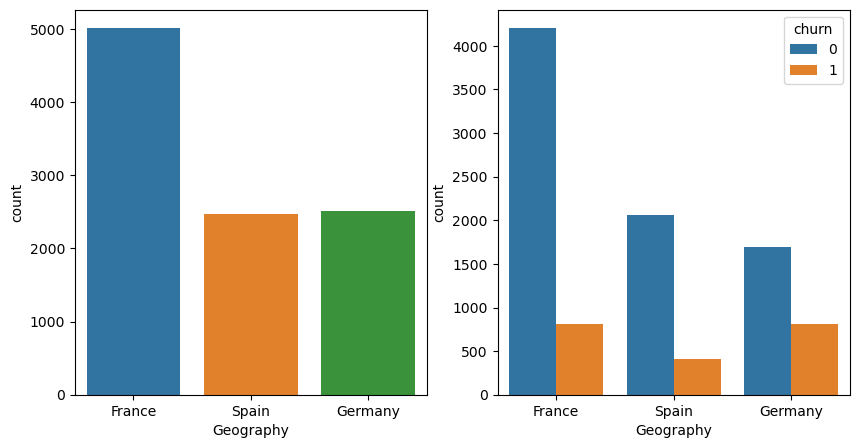

In [87]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Geography',data=df,ax=ax[0])
sns.countplot(x='Geography',data=df,ax=ax[1],hue='churn')

In [88]:
# From Above plot we can say that the spain and germany have the equal customers in the bank
# but france and german customers are the most churn customers as compare to the spain

# lets distributed with tenure

In [92]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

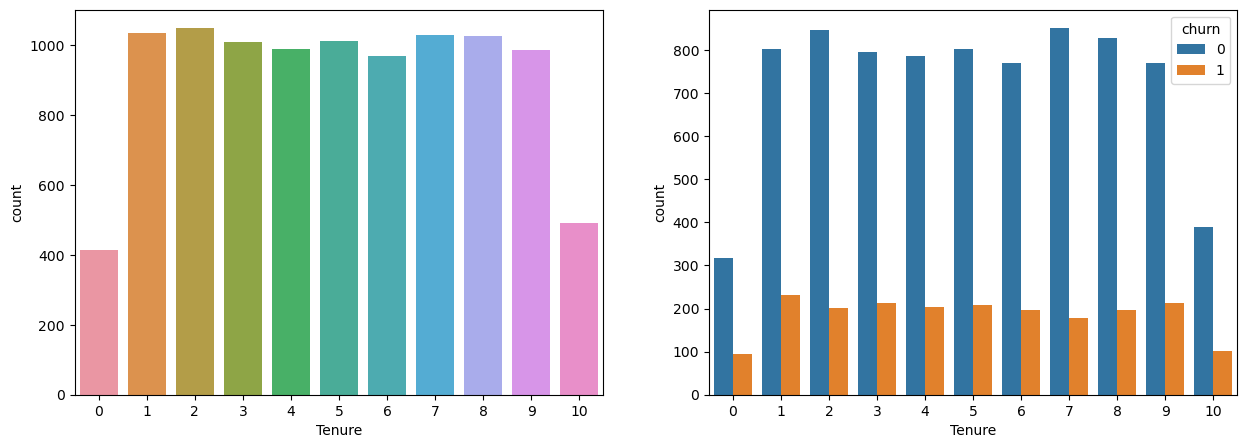

In [96]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure',data=df,ax=ax[0])
sns.countplot(x='Tenure',data=df,hue='churn',ax=ax[1])

In [97]:
# customers have the more tenure they are less churn from the bank, but 10 yr customers are high to churn from the bank

# Lets distributed with Bank Balance

<AxesSubplot:xlabel='Balance', ylabel='Count'>

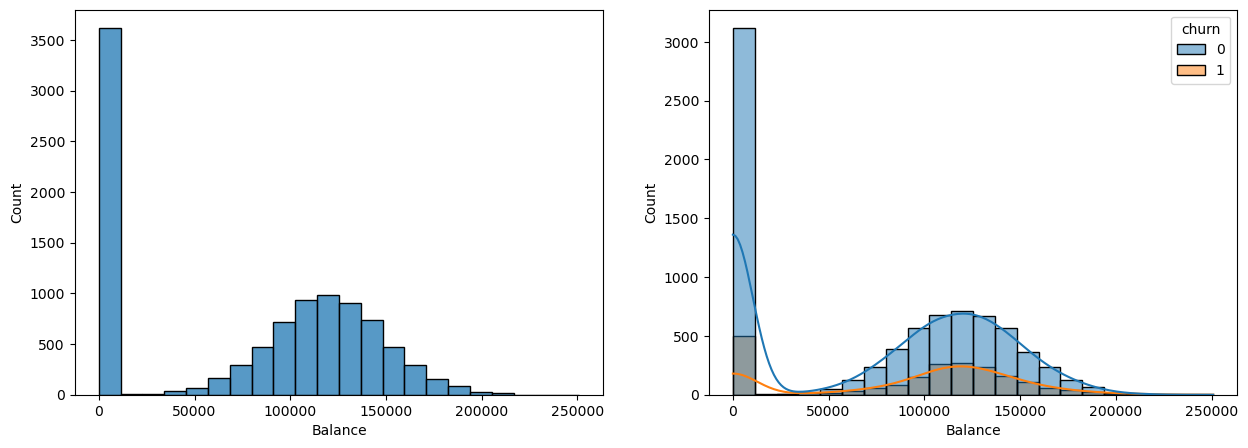

In [103]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(x='Balance',data=df,ax=ax[0])
sns.histplot(x='Balance',data=df,ax=ax[1],hue='churn',kde=True)

In [ ]:
# A huge customers have the bank balance 0 they are the higest number to churn
# The customers have balance between 1L to 1.5L they will churn the most

# Lets distributed with credit card

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

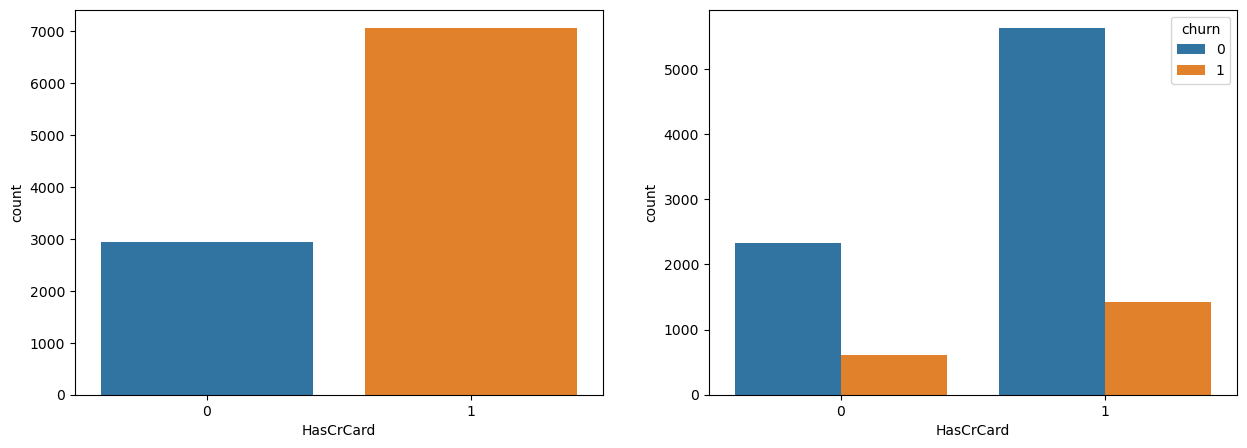

In [105]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HasCrCard',data=df,ax=ax[0])
sns.countplot(x='HasCrCard',data=df,ax=ax[1],hue='churn')

In [106]:
# 7k Customers have the credit card
# most of the customers have the credit card they will churn from the bank

# Feature Engeenerring

In [107]:
# Fature engineering the data for model

In [116]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [109]:
# geography and gender are the categorical features and less in cateogory
# use level encoder for them

In [120]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
cols=['Gender','Geography']
df[cols]=df[cols].apply(lr.fit_transform)

In [121]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0


In [122]:
#Next Preprocessing is standardize the value of crditscore balane Estimatedsalary

In [123]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()

In [126]:
df[['CreditScore','Balance','EstimatedSalary']]=stc.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [127]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1


In [128]:
# check the correlation
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

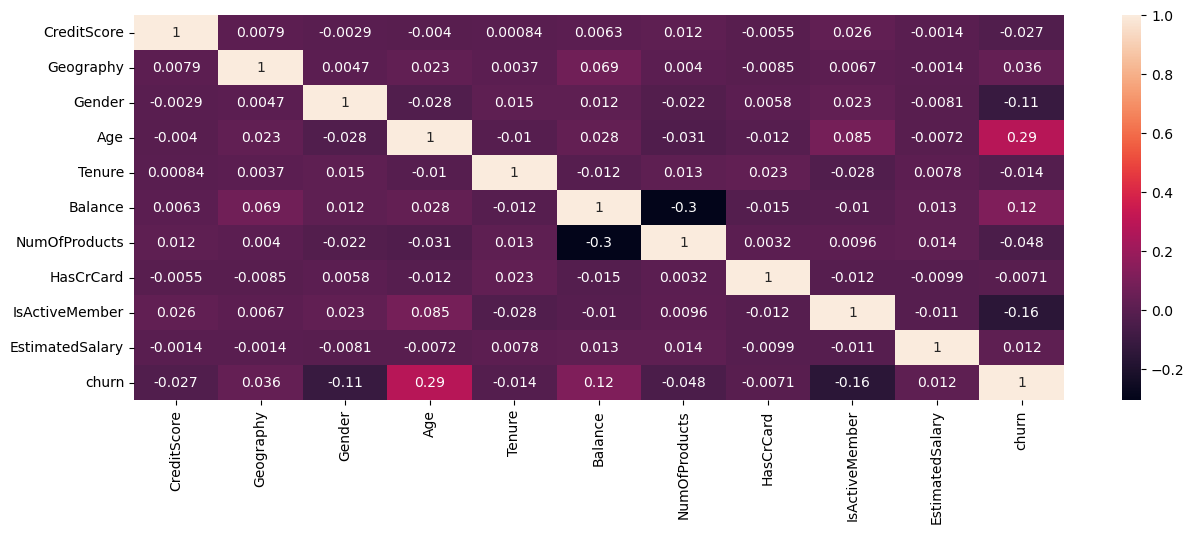

In [131]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,)

# Train Test Split

In [135]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='churn')
y=df['churn']

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model Building

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

In [139]:
param={
    'max_depth':[5,10,15,20,18,19,25,30],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,3,4,5,6,7,8,9],
    'random_state':[0,42]
}

In [140]:
grid=GridSearchCV(dtc,param_grid=param,cv=5,verbose=1)

In [141]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 18, 19, 25, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [0, 42]},
             verbose=1)

In [142]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'random_state': 0}

In [144]:
dtree = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 min_samples_leaf= 4,
 random_state= 0)

In [145]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=0)

In [147]:
dtree.score(X_train,y_train)

0.8557142857142858

In [148]:
y_pred=dtree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [152]:
accuracy_score(y_pred,y_test)

0.8613333333333333

In [153]:
confusion_matrix(y_test,y_pred)

array([[2367,   49],
       [ 367,  217]], dtype=int64)

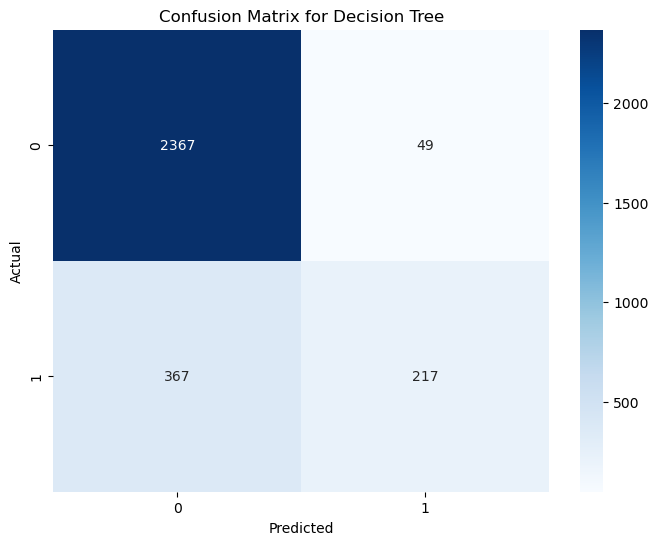

In [157]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [158]:
# try with random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc=RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,random_state=0)

In [161]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=0)

In [163]:
rfc_pred=rfc.predict(X_test)

In [165]:
rfc.score(X_train,y_train)

0.8567142857142858

In [166]:
accuracy_score(y_test,rfc_pred)

0.8643333333333333

In [167]:
confusion_matrix(y_test,rfc_pred)

array([[2383,   33],
       [ 374,  210]], dtype=int64)

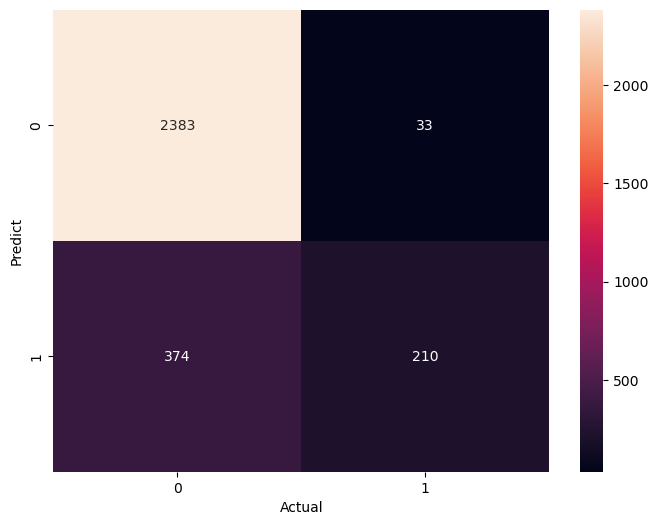

In [174]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.show()

In [180]:
import pickle
pickle.dump(rfc,open('rfc.pkl','wb'))
pickle.dump(dtree,open('dtree.pkl','wb'))
pickle.dump(stc,open('stc.pkl','wb'))